In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import urllib.parse

In [2]:
df = pd.read_csv('Big_Black_Money_Dataset.csv')
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,1/1/2013 0:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore
1,TX0000000002,China,4.965767e+06,Stocks Transfer,1/1/2013 1:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,1/1/2013 2:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,1/1/2013 3:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,1/1/2013 4:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg


In [3]:
# 1, what percentage of missing or null values exist in each column? how would you handle the missing values? 
missing_value_per = (df.isnull().sum())/ len(df) * 100
total_missing = df.isnull().sum()
missing_value_outcome = pd.concat([total_missing, missing_value_per], axis = 1)
missing_value_outcome

,0,1
Transaction ID,0,0.0
Country,0,0.0
Amount (USD),0,0.0
Transaction Type,0,0.0
Date of Transaction,0,0.0
Person Involved,0,0.0
Industry,0,0.0
Destination Country,0,0.0
Reported by Authority,0,0.0
Source of Money,0,0.0


In [4]:
# how would you handle it? 
# we can use forward of backwad fill or statistical method to handle it but no data is missing

In [5]:
# 2, Perform a summary of basic statistics (mean, median, standard deviation, min, max,) for the amount (USD) column. 
# use describe function which give a quick overview of your work
df['Amount (USD)'].describe()

count    1.000000e+04
mean     2.501818e+06
std      1.424364e+06
min      1.003180e+04
25%      1.279005e+06
50%      2.501310e+06
75%      3.722416e+06
max      4.999812e+06
Name: Amount (USD), dtype: float64

In [6]:
# identify any extreme outliers using z-scores or IQR method
# outliers are numbers that are far above the usual numbers in a given data eg [2,4,3,2,5,2,40,50,2,4,] 40 and 50 are the outliers here
# using z-score
from scipy import stats
z_scores = stats.zscore(df['Amount (USD)'])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print(outliers)
# the result shows that there are no outliers

Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country]
Index: []


In [7]:
# using inter quantile range IQR method
q1 = df['Amount (USD)'].quantile(0.25)
q3 = df['Amount (USD)'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_r = df[(df['Amount (USD)'] < lower_bound)|(df['Amount (USD)'] > upper_bound)]
print(outliers_r)
# the result shows that there are no outliers

Empty DataFrame
Columns: [Transaction ID, Country, Amount (USD), Transaction Type, Date of Transaction, Person Involved, Industry, Destination Country, Reported by Authority, Source of Money, Money Laundering Risk Score, Shell Companies Involved, Financial Institution, Tax Haven Country]
Index: []


In [8]:
# 3, how many unique values are present in the column country and destination country? are there any discrepances (e.g) spelling inconsistencies?
col = df[['Country', 'Destination Country']]
for x in col:
    print(df[x].unique())
# this result show that there are no duplicate or discrepancies

['Brazil' 'China' 'UK' 'UAE' 'South Africa' 'Russia' 'Switzerland' 'India'
 'USA' 'Singapore']
['USA' 'South Africa' 'Switzerland' 'Russia' 'Brazil' 'UK' 'India' 'China'
 'Singapore' 'UAE']


In [9]:
# 4, convert the date of transaction column into components like year, month and day. what are the most frequent transaction year and month 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction ID               10000 non-null  object 
 1   Country                      10000 non-null  object 
 2   Amount (USD)                 10000 non-null  float64
 3   Transaction Type             10000 non-null  object 
 4   Date of Transaction          10000 non-null  object 
 5   Person Involved              10000 non-null  object 
 6   Industry                     10000 non-null  object 
 7   Destination Country          10000 non-null  object 
 8   Reported by Authority        10000 non-null  bool   
 9   Source of Money              10000 non-null  object 
 10  Money Laundering Risk Score  10000 non-null  int64  
 11  Shell Companies Involved     10000 non-null  int64  
 12  Financial Institution        10000 non-null  object 
 13  Tax Haven Country

In [10]:
# first convert date of transaction column which is currently in object (string) to datetime 
df['Date of Transaction'] = pd.to_datetime(df['Date of Transaction'])
df['Year_of_Transaction'] = pd.DatetimeIndex(df['Date of Transaction']).year
df['Month_of_Transaction'] = pd.DatetimeIndex(df['Date of Transaction']).month
df['Day_of_Transaction'] = pd.DatetimeIndex(df['Date of Transaction']).day

In [11]:
# what are the most frequent transaction year and month
df['Year_of_Transaction'].value_counts().sort_values(ascending = False)

Year_of_Transaction
2013    8760
2014    1240
Name: count, dtype: int64

In [12]:
df['Month_of_Transaction'].value_counts().sort_values(ascending = False)

Month_of_Transaction
1     1488
2     1168
3      744
5      744
12     744
7      744
8      744
10     744
4      720
6      720
9      720
11     720
Name: count, dtype: int64

In [13]:
df['Day_of_Transaction'].value_counts().sort_values(ascending = False)

Day_of_Transaction
1     336
2     336
3     336
4     336
5     336
6     336
7     336
8     336
9     336
10    336
11    336
12    336
13    336
14    336
15    336
16    336
17    336
18    336
19    336
20    336
21    328
22    312
23    312
24    312
25    312
26    312
27    312
28    312
29    288
30    288
31    192
Name: count, dtype: int64

In [14]:
#5 Perform frequency counts of categorical columns such as transaction type and industry. are there any values that occur unusually often or rarely?
transaction_type_counts = df['Transaction Type'].value_counts()
industry_counts = df['Industry'].value_counts()
print(transaction_type_counts)
print(industry_counts)

Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64


In [15]:
# are there any values that occur unusually often or rarely?
rarely_threshold = 0.02 * len(df)
often_threshold = 0.18 * len(df)
print(transaction_type_counts[transaction_type_counts < rarely_threshold])
print(industry_counts[industry_counts < rarely_threshold])

print(transaction_type_counts[transaction_type_counts > rarely_threshold])
print(industry_counts[industry_counts > rarely_threshold])


Series([], Name: count, dtype: int64)
Series([], Name: count, dtype: int64)
Transaction Type
Property Purchase    2086
Stocks Transfer      1983
Offshore Transfer    1980
Cash Withdrawal      1978
Cryptocurrency       1973
Name: count, dtype: int64
Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Casinos         1377
Oil & Gas       1372
Name: count, dtype: int64


In [16]:
transaction_type_counts_per = (df['Transaction Type'].value_counts() / df['Transaction Type'].value_counts().sum())
print(transaction_type_counts_per)

Transaction Type
Property Purchase    0.2086
Stocks Transfer      0.1983
Offshore Transfer    0.1980
Cash Withdrawal      0.1978
Cryptocurrency       0.1973
Name: count, dtype: float64


In [17]:
transaction_type_counts_per = (df['Transaction Type'].value_counts() / df['Transaction Type'].value_counts().sum()) * 100
print(transaction_type_counts_per)

Transaction Type
Property Purchase    20.86
Stocks Transfer      19.83
Offshore Transfer    19.80
Cash Withdrawal      19.78
Cryptocurrency       19.73
Name: count, dtype: float64


In [18]:
industry_counts_per = (df['Industry'].value_counts() / df['Industry'].value_counts().sum())
print(industry_counts_per)

Industry
Finance         0.1475
Construction    0.1460
Luxury Goods    0.1459
Real Estate     0.1443
Arms Trade      0.1414
Casinos         0.1377
Oil & Gas       0.1372
Name: count, dtype: float64


In [19]:
industry_counts_per = (df['Industry'].value_counts() / df['Industry'].value_counts().sum()) * 100
print(industry_counts_per)

Industry
Finance         14.75
Construction    14.60
Luxury Goods    14.59
Real Estate     14.43
Arms Trade      14.14
Casinos         13.77
Oil & Gas       13.72
Name: count, dtype: float64


In [20]:
# installing vscode app
# after the vscode installation from the extention tab you install
# pylance, python, jupyter
# using the windows powershell
# pip install ipykernel, pandas, seaborn, matplotlip, plotly, xlsxwriter, lxml, scikit-learn, nltk, wheel, wordcloud, nbformat>=4.2.0, textblob, pymysql

In [21]:
#6 create a new column to cathegorise amount (USD) into bins (eg, low, medium, high). how many transaction fall into each category?
# first check the min and max value first
df['Amount (USD)'].max()

np.float64(4999812.409)

In [22]:
df['Amount (USD)'].min()

np.float64(10031.79673)

In [23]:
df['Amount (USD)'].max() - df['Amount (USD)'].min()
bins = [10031.80, 500000, 2000000, 4999812.41]
labels = ['low', 'medium', 'high']
df['Amount Category'] = pd.cut(df['Amount (USD)'], bins = bins, labels = labels, include_lowest = True)
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Year_of_Transaction,Month_of_Transaction,Day_of_Transaction,Amount Category
0,TX0000000001,Brazil,3.267530e+06,Offshore Transfer,2013-01-01 00:00:00,Person_1101,Construction,USA,True,Illegal,6,1,Bank_40,Singapore,2013,1,1,high
1,TX0000000002,China,4.965767e+06,Stocks Transfer,2013-01-01 01:00:00,Person_7484,Luxury Goods,South Africa,False,Illegal,9,0,Bank_461,Bahamas,2013,1,1,high
2,TX0000000003,UK,9.416750e+04,Stocks Transfer,2013-01-01 02:00:00,Person_3655,Construction,Switzerland,True,Illegal,1,3,Bank_387,Switzerland,2013,1,1,low
3,TX0000000004,UAE,3.864201e+05,Cash Withdrawal,2013-01-01 03:00:00,Person_3226,Oil & Gas,Russia,False,Illegal,7,2,Bank_353,Panama,2013,1,1,low
4,TX0000000005,South Africa,6.433784e+05,Cryptocurrency,2013-01-01 04:00:00,Person_7975,Real Estate,USA,True,Illegal,1,9,Bank_57,Luxembourg,2013,1,1,medium


In [24]:
# how many transaction fall into each category
df['Amount Category'].value_counts()

Amount Category
high      6010
medium    3049
low        940
Name: count, dtype: int64

In [25]:
#7 calculate the total number of transactions for each person involved. what are the descriptive statistics (mean, median, max) for transaction counts per person?
transaction_count = df.groupby('Person Involved').size()
mean_transaction = transaction_count.mean()
median_transaction = transaction_count.median()
max_transaction = transaction_count.max()
print(transaction_count)
print(f' the mean transaction for person involved is {mean_transaction}')
print(f' the median transaction for person involved is {median_transaction}')
print(f' the maximun transaction for person involved is {max_transaction}')


Person Involved
Person_1       1
Person_10      1
Person_100     1
Person_1000    1
Person_1002    1
              ..
Person_999     3
Person_9994    2
Person_9995    3
Person_9998    2
Person_9999    1
Length: 6320, dtype: int64
 the mean transaction for person involved is 1.5822784810126582
 the median transaction for person involved is 1.0
 the maximun transaction for person involved is 7


In [26]:
#8 create a feature representing the transaction time difference between consecutive transaction for each person. what are the avg and median time difference?
df.sort_values(by=['Person Involved', 'Date of Transaction'], inplace = True, ignore_index = True)
df['Time Diff'] = df.groupby('Person Involved')['Date of Transaction'].diff()
df.head()
# note that Nat means that there are no diff in that row

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Year_of_Transaction,Month_of_Transaction,Day_of_Transaction,Amount Category,Time Diff
0,TX0000000227,Singapore,3.746944e+06,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,9,5,Bank_200,Luxembourg,2013,1,10,high,NaT
1,TX0000005284,UAE,2.200251e+06,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,9,0,Bank_77,Switzerland,2013,8,9,high,NaT
2,TX0000009972,India,3.217272e+06,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,1,5,Bank_264,Switzerland,2014,2,20,high,NaT
3,TX0000005282,USA,5.342882e+05,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,5,9,Bank_349,Panama,2013,8,9,medium,NaT
4,TX0000005551,Singapore,2.169575e+06,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,6,7,Bank_440,Cayman Islands,2013,8,20,high,NaT


In [27]:
df.tail()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,Money Laundering Risk Score,Shell Companies Involved,Financial Institution,Tax Haven Country,Year_of_Transaction,Month_of_Transaction,Day_of_Transaction,Amount Category,Time Diff
9995,TX0000004014,Singapore,2.600608e+06,Cash Withdrawal,2013-06-17 05:00:00,Person_9995,Luxury Goods,China,False,Illegal,8,0,Bank_29,Singapore,2013,6,17,high,108 days 18:00:00
9996,TX0000009984,USA,4.105025e+06,Cryptocurrency,2014-02-20 23:00:00,Person_9995,Construction,Brazil,True,Legal,5,5,Bank_284,Bahamas,2014,2,20,high,248 days 18:00:00
9997,TX0000002998,Switzerland,2.727573e+06,Offshore Transfer,2013-05-05 21:00:00,Person_9998,Luxury Goods,China,False,Illegal,2,3,Bank_254,Singapore,2013,5,5,high,NaT
9998,TX0000004673,UK,9.596637e+05,Stocks Transfer,2013-07-14 16:00:00,Person_9998,Casinos,UK,True,Illegal,2,7,Bank_450,Luxembourg,2013,7,14,medium,69 days 19:00:00
9999,TX0000008730,India,2.647788e+06,Cash Withdrawal,2013-12-30 17:00:00,Person_9999,Luxury Goods,China,True,Illegal,7,8,Bank_220,Cayman Islands,2013,12,30,high,NaT


In [28]:
# what are the avg and median time difference?
print(df['Time Diff'].mean())
print(df['Time Diff'].median())

118 days 14:43:54.456521740
98 days 04:00:00


In [29]:
#8 how many transaction involved tax haven countries? calculate the proportion of transaction going to these countries
df['Tax Haven Country'].value_counts().sort_values(ascending = False)

Tax Haven Country
Panama            1743
Luxembourg        1681
Cayman Islands    1676
Singapore         1644
Switzerland       1628
Bahamas           1628
Name: count, dtype: int64

In [30]:
# calculate the proportion of transaction going to these countries
(df['Tax Haven Country'].value_counts().sort_values(ascending = False)/df['Tax Haven Country'].value_counts().sort_values(ascending = False).sum()) * 100

Tax Haven Country
Panama            17.43
Luxembourg        16.81
Cayman Islands    16.76
Singapore         16.44
Switzerland       16.28
Bahamas           16.28
Name: count, dtype: float64

In [31]:
#9 create a new feature called risk index that combines money laundering risk score and the number of shell companies involved.
# what is the range and average of this index?
df['Risk Index'] = df['Money Laundering Risk Score'] + df['Shell Companies Involved']
print(df['Risk Index'].head())
print(f'mean risk index is {df["Risk Index"].mean()}')
print(f'range risk index is {df["Risk Index"].max() - df["Risk Index"].min()}')


0    14
1     9
2     6
3    14
4    13
Name: Risk Index, dtype: int64
mean risk index is 9.9958
range risk index is 18


In [32]:
# 10 calculate the average money laundering risk score for each industry, what are the industries with the highest average risk? 
df.groupby('Industry')['Money Laundering Risk Score'].mean()

Industry
Arms Trade      5.570721
Casinos         5.556282
Construction    5.583562
Finance         5.711864
Luxury Goods    5.373544
Oil & Gas       5.427843
Real Estate     5.455301
Name: Money Laundering Risk Score, dtype: float64

In [33]:
# what are the industries with the highest average risk?
df.groupby('Industry')['Money Laundering Risk Score'].mean().sort_values(ascending = False).head(1)

Industry
Finance    5.711864
Name: Money Laundering Risk Score, dtype: float64

In [34]:
#11 create a binary flag to indicate high-risk transactions where the money laundering risk score is greater than 7 and more than 2 shell companies involved.
# how many transaction meet this criteria?
# note the result will return as true/false (boolean) but since the question says binary, we use the astype function to convert the true/false to number
# note also that true = 1, false = 0
df['High Risk Flag'] = ((df['Money Laundering Risk Score'] > 7) & (df['Shell Companies Involved'] > 2)).astype(int)
df.head()

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,...,Shell Companies Involved,Financial Institution,Tax Haven Country,Year_of_Transaction,Month_of_Transaction,Day_of_Transaction,Amount Category,Time Diff,Risk Index,High Risk Flag
0,TX0000000227,Singapore,3.746944e+06,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,...,5,Bank_200,Luxembourg,2013,1,10,high,NaT,14,1
1,TX0000005284,UAE,2.200251e+06,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,...,0,Bank_77,Switzerland,2013,8,9,high,NaT,9,0
2,TX0000009972,India,3.217272e+06,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,...,5,Bank_264,Switzerland,2014,2,20,high,NaT,6,0
3,TX0000005282,USA,5.342882e+05,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,...,9,Bank_349,Panama,2013,8,9,medium,NaT,14,0
4,TX0000005551,Singapore,2.169575e+06,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,...,7,Bank_440,Cayman Islands,2013,8,20,high,NaT,13,0


In [35]:
# how many transaction meet this criteria?
df['High Risk Flag'].value_counts()
# this means that 2115 transaction meet the criteria

High Risk Flag
0    7885
1    2115
Name: count, dtype: int64

In [36]:
# 12 what are the most common combinations of transaction type and industry?
# provide the top 5 most frequent combinations.
common_combinations = df.groupby(['Transaction Type', 'Industry']).size().reset_index(name = 'count')
print(common_combinations)

     Transaction Type      Industry  count
0     Cash Withdrawal    Arms Trade    282
1     Cash Withdrawal       Casinos    272
2     Cash Withdrawal  Construction    318
3     Cash Withdrawal       Finance    282
4     Cash Withdrawal  Luxury Goods    301
5     Cash Withdrawal     Oil & Gas    264
6     Cash Withdrawal   Real Estate    259
7      Cryptocurrency    Arms Trade    287
8      Cryptocurrency       Casinos    277
9      Cryptocurrency  Construction    275
10     Cryptocurrency       Finance    289
11     Cryptocurrency  Luxury Goods    288
12     Cryptocurrency     Oil & Gas    284
13     Cryptocurrency   Real Estate    273
14  Offshore Transfer    Arms Trade    261
15  Offshore Transfer       Casinos    272
16  Offshore Transfer  Construction    277
17  Offshore Transfer       Finance    319
18  Offshore Transfer  Luxury Goods    301
19  Offshore Transfer     Oil & Gas    254
20  Offshore Transfer   Real Estate    296
21  Property Purchase    Arms Trade    303
22  Propert

In [37]:
# provide the top 5 most frequent combinations.
top_5 = common_combinations.sort_values(by = 'count', ascending = False)
print(top_5.head(5))

     Transaction Type      Industry  count
27  Property Purchase   Real Estate    324
17  Offshore Transfer       Finance    319
2     Cash Withdrawal  Construction    318
23  Property Purchase  Construction    311
21  Property Purchase    Arms Trade    303


In [38]:
# 13 compute the mean, median and standrd deviation for the amount (USD) for each country. 
# which countries have the highest avg transaction amount?
country_stat = df.groupby('Country')['Amount (USD)'].agg(['mean', 'median', 'std']).reset_index()
country_stat_sorted = country_stat.sort_values(by = 'mean', ascending = False)
country_stat_sorted

,Country,mean,median,std
1,China,2.593129e+06,2.644712e+06,1.436594e+06
6,Switzerland,2.517068e+06,2.592528e+06,1.428701e+06
5,South Africa,2.510831e+06,2.455383e+06,1.398297e+06
4,Singapore,2.508388e+06,2.561971e+06,1.422815e+06
3,Russia,2.501651e+06,2.478250e+06,1.450927e+06
0,Brazil,2.498370e+06,2.465548e+06,1.423476e+06
8,UK,2.492823e+06,2.489680e+06,1.442969e+06
2,India,2.492579e+06,2.518758e+06,1.411817e+06
7,UAE,2.490049e+06,2.442782e+06,1.435933e+06
9,USA,2.407059e+06,2.362195e+06,1.390338e+06


In [39]:
#14 class work
# calculate the average money laundering risk score for each country and compare them.
# are there any countries that have significantly higher scores that others?
risk_score = df.groupby('Country')['Money Laundering Risk Score'].mean().reset_index()
outcome = risk_score.sort_values('Money Laundering Risk Score', ascending = False)
outcome


,Country,Money Laundering Risk Score
2,India,5.613131
4,Singapore,5.585930
0,Brazil,5.579523
6,Switzerland,5.557360
8,UK,5.542406
1,China,5.510597
9,USA,5.492292
7,UAE,5.478484
5,South Africa,5.476608
3,Russia,5.428285


In [40]:
df.groupby('Country')['Money Laundering Risk Score'].mean().sort_values(ascending = False)

Country
India           5.613131
Singapore       5.585930
Brazil          5.579523
Switzerland     5.557360
UK              5.542406
China           5.510597
USA             5.492292
UAE             5.478484
South Africa    5.476608
Russia          5.428285
Name: Money Laundering Risk Score, dtype: float64

In [41]:
# 15 analyse the percentage of transaction that were reported by authority and compare the average amount (USD) and risk score for reported versus non reported transactions.
total_trans = len(df)
reported_trans = len(df[df['Reported by Authority'] == 1])
perc_rep = (reported_trans/total_trans) * 100
print(perc_rep)

20.05


In [42]:
# compare the average amount (USD) and risk score for reported versus non reported transactions.
reported_stat = df.groupby('Reported by Authority').agg({'Amount (USD)':'mean', 'Money Laundering Risk Score':'mean'}).reset_index()
print(f'percentage of transaction reported by the authority: {perc_rep:.2f}%')
print(reported_stat)

percentage of transaction reported by the authority: 20.05%
   Reported by Authority  Amount (USD)  Money Laundering Risk Score
0                  False  2.498099e+06                     5.521326
1                   True  2.516646e+06                     5.546633


In [43]:
# or do number 15 this way
reported_stat = df.groupby('Reported by Authority')[['Amount (USD)', 'Money Laundering Risk Score']].mean().reset_index()
reported_stat
# percentage that are not reported
total_trans = len(df)
reported_trans_n = len(df[df['Reported by Authority'] == 0])
perc_rep_n = (reported_trans_n/total_trans) * 100
print(f'percentage of transaction not reported by the authority: {perc_rep_n:.2f}%')

percentage of transaction not reported by the authority: 79.95%


In [44]:
df

,Transaction ID,Country,Amount (USD),Transaction Type,Date of Transaction,Person Involved,Industry,Destination Country,Reported by Authority,Source of Money,...,Shell Companies Involved,Financial Institution,Tax Haven Country,Year_of_Transaction,Month_of_Transaction,Day_of_Transaction,Amount Category,Time Diff,Risk Index,High Risk Flag
0,TX0000000227,Singapore,3.746944e+06,Offshore Transfer,2013-01-10 10:00:00,Person_1,Real Estate,USA,False,Legal,...,5,Bank_200,Luxembourg,2013,1,10,high,NaT,14,1
1,TX0000005284,UAE,2.200251e+06,Cryptocurrency,2013-08-09 03:00:00,Person_10,Real Estate,India,False,Legal,...,0,Bank_77,Switzerland,2013,8,9,high,NaT,9,0
2,TX0000009972,India,3.217272e+06,Property Purchase,2014-02-20 11:00:00,Person_100,Finance,UAE,False,Illegal,...,5,Bank_264,Switzerland,2014,2,20,high,NaT,6,0
3,TX0000005282,USA,5.342882e+05,Cash Withdrawal,2013-08-09 01:00:00,Person_1000,Oil & Gas,UK,False,Illegal,...,9,Bank_349,Panama,2013,8,9,medium,NaT,14,0
4,TX0000005551,Singapore,2.169575e+06,Stocks Transfer,2013-08-20 06:00:00,Person_1002,Luxury Goods,USA,False,Illegal,...,7,Bank_440,Cayman Islands,2013,8,20,high,NaT,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TX0000004014,Singapore,2.600608e+06,Cash Withdrawal,2013-06-17 05:00:00,Person_9995,Luxury Goods,China,False,Illegal,...,0,Bank_29,Singapore,2013,6,17,high,108 days 18:00:00,8,0
9996,TX0000009984,USA,4.105025e+06,Cryptocurrency,2014-02-20 23:00:00,Person_9995,Construction,Brazil,True,Legal,...,5,Bank_284,Bahamas,2014,2,20,high,248 days 18:00:00,10,0
9997,TX0000002998,Switzerland,2.727573e+06,Offshore Transfer,2013-05-05 21:00:00,Person_9998,Luxury Goods,China,False,Illegal,...,3,Bank_254,Singapore,2013,5,5,high,NaT,5,0
9998,TX0000004673,UK,9.596637e+05,Stocks Transfer,2013-07-14 16:00:00,Person_9998,Casinos,UK,True,Illegal,...,7,Bank_450,Luxembourg,2013,7,14,medium,69 days 19:00:00,9,0


# assignment

In [45]:
#1, what are the top 5 most frequent industries involved in transactions? compare thier average amount (USD) and risk score
most_freq_indus = df['Industry'].value_counts().head(5).sort_values(ascending = False)
most_freq_indus

Industry
Finance         1475
Construction    1460
Luxury Goods    1459
Real Estate     1443
Arms Trade      1414
Name: count, dtype: int64

In [46]:
# compare thier average amount (USD) and risk score
most_freq_indus = df.groupby('Industry').agg({'Amount (USD)':'mean', 'Money Laundering Risk Score':'mean'}).reset_index()
most_freq_indus

,Industry,Amount (USD),Money Laundering Risk Score
0,Arms Trade,2.546362e+06,5.570721
1,Casinos,2.482550e+06,5.556282
2,Construction,2.538177e+06,5.583562
3,Finance,2.532829e+06,5.711864
4,Luxury Goods,2.465999e+06,5.373544
5,Oil & Gas,2.466224e+06,5.427843
6,Real Estate,2.478126e+06,5.455301


In [47]:
#2 for each transaction type, compute the average and median amount (USD). which transaction type involves higher monetary amount
tran_type_stat = df.groupby('Transaction Type')['Amount (USD)'].agg(['mean', 'median']).reset_index()
tran_type_stat


,Transaction Type,mean,median
0,Cash Withdrawal,2.507551e+06,2.524111e+06
1,Cryptocurrency,2.521129e+06,2.551082e+06
2,Offshore Transfer,2.527693e+06,2.515103e+06
3,Property Purchase,2.450534e+06,2.374724e+06
4,Stocks Transfer,2.504995e+06,2.546577e+06


In [48]:
# which transaction type involves higher monetary amount
tran_type_stat_sorted = tran_type_stat.sort_values(by = 'mean', ascending = False)
tran_type_stat_sorted

,Transaction Type,mean,median
2,Offshore Transfer,2.527693e+06,2.515103e+06
1,Cryptocurrency,2.521129e+06,2.551082e+06
0,Cash Withdrawal,2.507551e+06,2.524111e+06
4,Stocks Transfer,2.504995e+06,2.546577e+06
3,Property Purchase,2.450534e+06,2.374724e+06


In [49]:
#3 compute the proportion of transaction marked as involving illegal sources of money. how does this proportion vary across countries?
total_trans = len(df)
illegal_source =len(df[df['Source of Money'] == 1])
perc_illegal = (illegal_source/total_trans) * 100
print(perc_illegal)


0.0


In [50]:
# how does this proportion vary across countries?

In [51]:
# compare the number of transaction and the average risk score for transaction involving 0, 1 or more than 1 shell company
total_trans = len(df)
above_one = len(df[df['Shell Companies Involved'] > 1])
perc_rep = (above_one/total_trans) * 100
print(perc_rep)


tran_inv_zero_shellcom = df.groupby('Shell Companies Involved').agg({'Transaction ID':'sum', 'Money Laundering Risk Score':'mean'}).reset_index()
print(tran_inv_zero_shellcom)



79.56
   Shell Companies Involved  \
0                         0   
1                         1   
2                         2   
3                         3   
4                         4   
5                         5   
6                         6   
7                         7   
8                         8   
9                         9   

                                      Transaction ID  \
0  TX0000005284TX0000009171TX0000002275TX00000081...   
1  TX0000001759TX0000006406TX0000006134TX00000060...   
2  TX0000008661TX0000008565TX0000004680TX00000062...   
3  TX0000003093TX0000005639TX0000004756TX00000071...   
4  TX0000006078TX0000009261TX0000007436TX00000087...   
5  TX0000000227TX0000009972TX0000007208TX00000020...   
6  TX0000005731TX0000008027TX0000007085TX00000048...   
7  TX0000005551TX0000001396TX0000006752TX00000073...   
8  TX0000003141TX0000008262TX0000002655TX00000032...   
9  TX0000005282TX0000002770TX0000004867TX00000040...   

   Money Laundering Risk Score  
0 

In [52]:
#4, analyse the average and median amount (USD) for transaction involving tax haven countries compared to those that do not involve tax havens. 
# how significant is the difference?
tax_haven_stat = df.groupby('Tax Haven Country')['Amount (USD)'].agg(['mean', 'median']).reset_index()
tax_haven_stat_sorted = tax_haven_stat.sort_values(by = 'mean', ascending = False)
tax_haven_stat_sorted



,Tax Haven Country,mean,median
5,Switzerland,2.523432e+06,2.496544e+06
4,Singapore,2.510816e+06,2.515120e+06
2,Luxembourg,2.502509e+06,2.468006e+06
1,Cayman Islands,2.502189e+06,2.515616e+06
3,Panama,2.500342e+06,2.552703e+06
0,Bahamas,2.471600e+06,2.455664e+06


In [54]:
# perform a correlation analysis between amount (USD), money laundering risk score and shell companies involved.
# what are the correlation cooefficients, and what do they imply?
coor_analysis = df[['Amount (USD)', 'Money Laundering Risk Score', 'Shell Companies Involved']]

In [55]:
coor_matrix = coor_analysis.corr()
print(coor_matrix)

                             Amount (USD)  Money Laundering Risk Score  \
Amount (USD)                     1.000000                     0.016529   
Money Laundering Risk Score      0.016529                     1.000000   
Shell Companies Involved        -0.017905                    -0.019262   

                             Shell Companies Involved  
Amount (USD)                                -0.017905  
Money Laundering Risk Score                 -0.019262  
Shell Companies Involved                     1.000000  


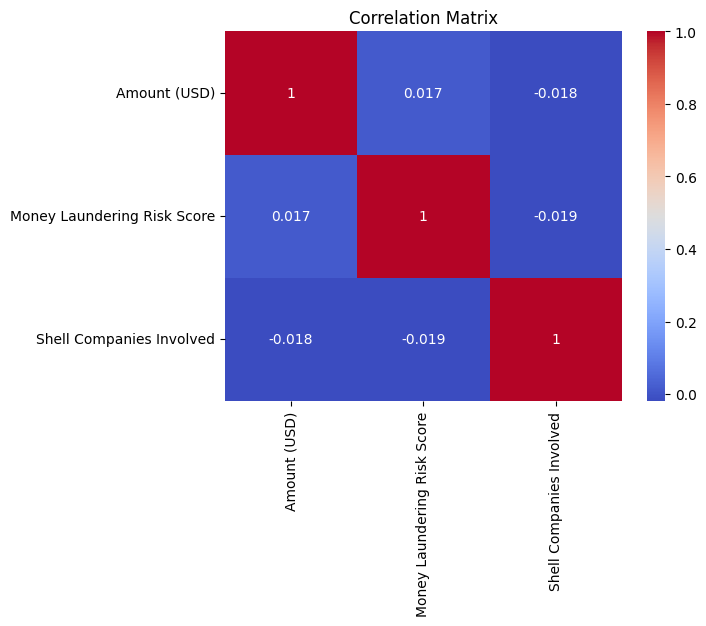

In [56]:
sns.heatmap(coor_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# movie assignment 

In [71]:
df_m = pd.read_csv('16k_Movies.csv')
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16290 entries, 0 to 16289
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16290 non-null  int64  
 1   Title                16290 non-null  object 
 2   Release Date         16290 non-null  object 
 3   Description          16290 non-null  object 
 4   Rating               12846 non-null  float64
 5   No of Persons Voted  12829 non-null  object 
 6   Directed by          16283 non-null  object 
 7   Written by           15327 non-null  object 
 8   Duration             16277 non-null  object 
 9   Genres               16285 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.2+ MB


In [72]:
# 1, what percentage of missing or null values exist in key column such as description, directed by and written by? how would you handle these missing values? 
missing_value_per = (df_m.isnull().sum()) / len(df_m) * 100
total_missing = df_m.isnull().sum()
missing_value_outcome = pd.concat([total_missing, missing_value_per], axis = 1)
missing_value_outcome

,0,1
Unnamed: 0,0,0.000000
Title,0,0.000000
Release Date,0,0.000000
Description,0,0.000000
Rating,3444,21.141805
No of Persons Voted,3461,21.246163
Directed by,7,0.042971
Written by,963,5.911602
Duration,13,0.079804
Genres,5,0.030694


In [73]:
# how would you handle it?
# i used statistical method to handle (fill) the missing data in column rating
df_m = df_m.copy()
df_m['Rating'].fillna(df_m['Rating'].mean(),inplace = True)
df_m.tail()

C:\Users\Goerge R\AppData\Local\Temp\ipykernel_9876\1725425422.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_m['Rating'].fillna(df_m['Rating'].mean(),inplace = True)


,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
16285,16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,6.617632,NaN,NaN,NaN,\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",6.617632,NaN,Michelle Esrick,NaN,Not Rated,Documentary
16287,16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,6.617632,NaN,Julian P. Hobbs,NaN,1 h 20 m,Documentary
16288,16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,6.617632,NaN,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"
16289,16289,7th Street,"Jan 17, 2003",This documentary explores change in one of the...,6.617632,NaN,Josh Pais,Josh Pais,\n http://www.7thstreetmovie.com/\n ...,Documentary


In [74]:
# how would you handle it?
# i used forward fill method to handle (fill) the missing data in other columns because statistical did not work 
df_m = df_m.copy()
df_m.fillna(method = 'ffill', inplace = True)
df_m.tail()

C:\Users\Goerge R\AppData\Local\Temp\ipykernel_9876\670535256.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_m.fillna(method = 'ffill', inplace = True)


,Unnamed: 0,Title,Release Date,Description,Rating,No of Persons Voted,Directed by,Written by,Duration,Genres
16285,16285,Boys to Men,"Apr 27, 2001",Compilation of 4 short films from different di...,6.617632,10,Mark Christensen,"Mark Christensen, Brian Hamill",\n https://www.amazon.com/Boys-Men-Phil...,Drama
16286,16286,Saint Misbehavin': The Wavy Gravy Movie,"Dec 10, 2010","Beginning with Woodstock ‘99, director Michell...",6.617632,10,Michelle Esrick,"Mark Christensen, Brian Hamill",Not Rated,Documentary
16287,16287,Collectors,"Oct 1, 2000",America is drawn to the macabre handiwork of t...,6.617632,10,Julian P. Hobbs,"Mark Christensen, Brian Hamill",1 h 20 m,Documentary
16288,16288,Bonhoeffer,"Jun 20, 2003",Dramatic documentary about the young German pa...,6.617632,10,Martin Doblmeier,Martin Doblmeier,1 h 33 m,"Documentary,Biography,History,War"
16289,16289,7th Street,"Jan 17, 2003",This documentary explores change in one of the...,6.617632,10,Josh Pais,Josh Pais,\n http://www.7thstreetmovie.com/\n ...,Documentary


In [ ]:
# 2, Perform a summary of basic statistics (mean, median, standard deviation, min, max,) for rating column. identify any outliers in movie ratings using statistical methods such as Z-scores or IQR  
# use describe function which give a quick overview of your work
df_m['Rating'].describe()

count    16290.000000
mean         6.617632
std          1.256782
min          0.300000
25%          6.100000
50%          6.617632
75%          7.400000
max         10.000000
Name: Rating, dtype: float64

In [ ]:
# identify any outliers in movie ratings using statistical methods such as Z-scores or IQR 
# using z-score
from scipy import stats
z_scores = stats.zscore(df_m['Rating'])
outliers = df_m[(z_scores > 3) | (z_scores < -3)]
print(outliers)

In [ ]:
# using inter quantile range IQR method
q1 = df_m['Rating'].quantile(0.25)
q3 = df_m['Rating'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers_r = df_m[(df_m['Rating'] < lower_bound)|(df_m['Rating'] > upper_bound)]
print(outliers_r)

In [ ]:
#3, how many unique genres exist in the dataset? what are the most common genres overtime?
df_m['Genres'].unique()

In [ ]:
df_m['Genres'].nunique()

In [ ]:
df_m['Genres'].value_counts()

In [ ]:
#4, convert the release date column into components like year and month, what are the most frequent movies release year and months?
# first convert column which is currently in object (string) to datetime 
df_m['Release Date'] = pd.to_datetime(df_m['Release Date'])
df_m['Release_Year'] = pd.DatetimeIndex(df_m['Release Date']).year
df_m['Release_Month'] = pd.DatetimeIndex(df_m['Release Date']).month
df_m['Release_Day'] = pd.DatetimeIndex(df_m['Release Date']).day


In [ ]:
# what are the most frequent movie release year
df_m['Release_Year'].value_counts().sort_values(ascending = False) 

In [ ]:
# what are the most frequent movie release month 
df_m['Release_Month'].value_counts().sort_values(ascending = False)

In [ ]:
# what are the most frequent movie release day 
df_m['Release_Day'].value_counts().sort_values(ascending = False)

In [ ]:
#5, how many duplicate movies exist based on the title column?, what steps would you take to remove duplicate if any?
# to check if there is duplicate
df_m.duplicated()

In [ ]:
df_m['Title'].duplicated()
# there are no duplicated data

In [ ]:
df_m['Title'].unique()

In [ ]:
#6, perform frequency count of cathegorical columns such as Directed by and Written by. which directors and screen writters have the most movies in the dataset?
directed_by_counts = df_m['Directed by'].value_counts()
written_by_counts = df_m['Written by'].value_counts()
print(directed_by_counts)
print(written_by_counts)
# from the result below:
# director with most movie is WOODY ALLEN
# screen writer with most movie is WOODY ALLEN

In [ ]:
#7, create a new column that classifies movies based on thier duration (eg: short, medium and long), how many movies fall into each category, and how does the rating vary by category?


In [ ]:
#8, what are the average and median number of persons voted per movie? what is the relationship between the number of votes and the movie ratings?
persons_voted = df_m.groupby('No of Persons Voted').size()
mean_persons_voted = persons_voted.mean()
median_persons_voted = persons_voted.median()
print(f' the mean number of persons voted per movie is {mean_persons_voted}')
print(f' the median number of persons voted per movie is {median_persons_voted}')

In [ ]:
# what is the relationship between the number of votes and the movie ratings?
fig = px.histogram(x = df_m ['No of Persons Voted'], color =df_m['Rating'], text_auto = True, barmode = 'group' )
fig.show()


In [ ]:
#9, calculate the total number of movies directed by each director. 
# what are the descriptive statistics (mean, median, max) for the number of movies directed per individual
movie_count = df_m.groupby('Directed by').size()
mean_movie = movie_count.mean()
median_movie = movie_count.median()
max_movie = movie_count.max()
print(movie_count)
print(f' the mean movie for the number of movies directed per individual is {mean_movie}')
print(f' the median movie for the number of movies directed per individual is {median_movie}')
print(f' the maximun movie for the number of movies directed per individual is {max_movie}')

In [ ]:
#10, analyse the distribution of movies across different decades. what decade have the highest average movie rating?

In [ ]:
#11, how many movies belong to different genre? what percentage of movies in each genre also belong to another genre?

In [ ]:
#13, calcutate the avg rating for each genres, which genres have the highest and lowest avg rating?
avg_rating_for_genres = df_m.groupby('Genres')['Rating'].mean().reset_index()
outcome = avg_rating_for_genres.sort_values('Rating', ascending = False)
outcome
# which genres have the highest and lowest avg rating?
# 1361	Documentary,Drama,Family,History	9.8 and 1425	Drama,Crime,Action	1.1

In [ ]:
#14, create a new binary flag to indicate a high-rated movies (with a rating greater than 75), how many movies fall into this cathegory?
df_m['High Rated Movie'] = ((df_m['Rating'] > 7.5)).astype(int)
df_m.head()
df_m['High Rated Movie'].value_counts()

In [ ]:
# 15, extract the year from the release date column and calculate the number of movies released per year. what trend in movies releases can be observed over time?
df_m['Release Date'] = pd.to_datetime(df_m['Release Date'])
df_m['Release_Year'] = pd.DatetimeIndex(df_m['Release Date']).year
df_m['Release_Year']
# calculate the number of movies released per year 
df_m['Release_Year'].value_counts().sort_values(ascending = False)


In [ ]:
# what trend in movies releases can be observed over time?
fig = px.line(x = df_m['Release_Year'], y = df_m['Release_Year'])
fig.show()
# this means that nigeria population have been growing steadily

In [ ]:
# 16, identify the most common combination of genres (eg, drama + comedy). what are the top 5 most frequent genres combination
df_m['Genres'].value_counts().sort_values(ascending = False)

In [ ]:
# 17, compute the mean, median and standard deviation for rating across diff movie duration(short, medium and long) which duration group have the highest average rating

In [ ]:
#18, compare the average and median rating for movies with single and multiple directors. is there a significant diff in rating?


In [ ]:
#19, what are the top 5 most frequent screenwriters(written by) in the dataset? how do thier movies average rating compare?
df_m['Written by'].value_counts().sort_values(ascending= False)

In [ ]:
# how do thier movies average rating compare?
df_m.groupby('Written by')['Rating'].mean().sort_values(ascending= False)
# not sure of this answer